In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\Automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Steps to be followed to get data into right format to apply Machine Learning Algorithm
### 1) Variable Identification (Finding out X anf Y)
### 2) Missing Value identification/ Class Imbalance  (Mean, Median, Mode, Nearest Neighbor Imputation)
### 3) Univariate Analysis
### 4) Multivariate Analysis
### 5) Inferences 

### Eliminate Class imbalance: ROS(Random Over Sampling), RUS(Random Under Sampling), SMOTE(Synthetic Minority Oversampling Technique)

In [5]:
normalized_mean=df[df["normalized-losses"]!='?']["normalized-losses"].astype(float).mean()

In [6]:
df["normalized-losses"]=df["normalized-losses"].replace("?",normalized_mean).astype(float)

In [7]:
def eliminate_question_mark_mean(col,symbol):
    mean=df[df[col]!=symbol][col].astype(float).mean()
    df[col]=df[col].replace(symbol,mean).astype(float)

In [8]:
from word2number import w2n
w2n.word_to_num("two")

2

In [9]:
numofdoors=[]
for x in list(df["num-of-doors"]):
    if(x!="?"):
        numofdoors.append(w2n.word_to_num(x))
    else:
        numofdoors.append(x)

In [10]:
df["num-of-doors"]=numofdoors

In [11]:
def eliminate_question_mark_mode(col,symbol):
    mode=df[df[col]!=symbol][col].astype(float).value_counts().idxmax()
    df[col]=df[col].replace(symbol,mode).astype(float)

In [12]:
eliminate_question_mark_mode("num-of-doors","?")

In [13]:
numofdoors=[]
for x in list(df["num-of-cylinders"]):
    if(x!="?"):
        numofdoors.append(w2n.word_to_num(x))
    else:
        numofdoors.append(x)

In [14]:
df["num-of-cylinders"]=numofdoors

In [15]:
eliminate_question_mark_mean("horsepower","?")

In [16]:
eliminate_question_mark_mean("peak-rpm","?")

In [17]:
eliminate_question_mark_mean("stroke","?")

In [18]:
eliminate_question_mark_mean("bore","?")

In [19]:
eliminate_question_mark_mean("price","?")

In [20]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [21]:
df["num-of-cylinders"]=df["num-of-cylinders"].astype('category')

In [22]:
df["num-of-doors"]=df["num-of-doors"].astype('category')

In [23]:
df.dtypes

symboling               int64
normalized-losses     float64
make                   object
fuel-type              object
aspiration             object
num-of-doors         category
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders     category
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
dtype: object

# Univariate Analysis

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

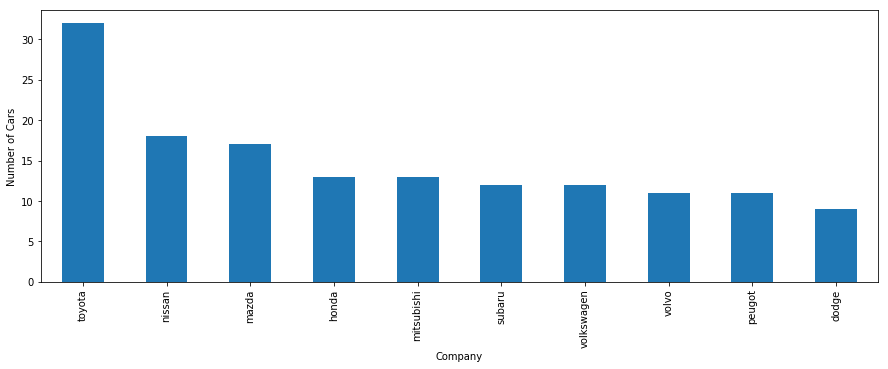

In [25]:
df["make"].value_counts().head(10).plot(kind='bar',figsize=(15,5))
plt.xlabel("Company")
plt.ylabel("Number of Cars")
plt.show()

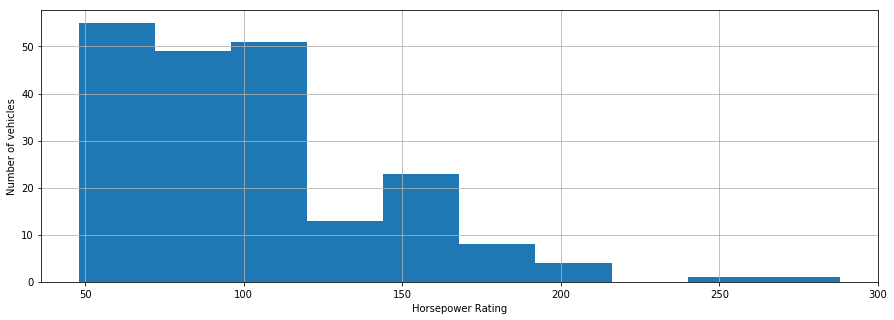

In [26]:
df["horsepower"].hist(bins=10,figsize=(15,5))
plt.xlabel("Horsepower Rating")
plt.ylabel("Number of vehicles")
plt.show()

#### For Better understanding follow the following link
https://www.kaggle.com/toramky/eda-for-automobile-dataset

#### You can also refer to "NeelKudu_Assignment_3" from Github
https://github.com/neelkudu/GreyAtomCodes/blob/master/NeelKudu_Assignment_3.ipynb